In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.rcParams['figure.figsize'] = (4, 3) 

#### Read Data from File - 

In [18]:
df = pd.read_csv("auto-mpg.csv")
df.head()

,car name,origin,model year,mpg,cylinders,displacement,horsepower,weight,acceleration
0,chevrolet chevelle malibu,1,70,18.0,8,307.0,130,3504,12.0
1,buick skylark 320,1,70,15.0,8,350.0,165,3693,11.5
2,plymouth satellite,1,70,18.0,8,318.0,150,3436,11.0
3,amc rebel sst,1,70,16.0,8,304.0,150,3433,12.0
4,ford torino,1,70,17.0,8,302.0,140,3449,10.5


In [6]:
df.isna().any()

car name        False
origin          False
model year      False
mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
dtype: bool

In [7]:
df.dtypes

car name         object
origin            int64
model year        int64
mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
dtype: object

In [19]:
df.horsepower[np.logical_not(df.horsepower.str.isdigit())]

32     ?
126    ?
330    ?
336    ?
354    ?
374    ?
Name: horsepower, dtype: object

In [22]:
df.horsepower.replace("?", "0", inplace=True)
df.horsepower = df.horsepower.astype(int)

In [23]:
df.head()

,car name,origin,model year,mpg,cylinders,displacement,horsepower,weight,acceleration
0,chevrolet chevelle malibu,1,70,18.0,8,307.0,130,3504,12.0
1,buick skylark 320,1,70,15.0,8,350.0,165,3693,11.5
2,plymouth satellite,1,70,18.0,8,318.0,150,3436,11.0
3,amc rebel sst,1,70,16.0,8,304.0,150,3433,12.0
4,ford torino,1,70,17.0,8,302.0,140,3449,10.5


In [28]:
print(list(df.columns))

['car name', 'origin', 'model year', 'mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']


In [41]:
df = pd.read_csv("auto-mpg.csv")
df.horsepower = df.horsepower.replace("?", "0").astype(int)
df = df.loc[:, ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration"]]
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130,3504,12.0
1,15.0,8,350.0,165,3693,11.5
2,18.0,8,318.0,150,3436,11.0
3,16.0,8,304.0,150,3433,12.0
4,17.0,8,302.0,140,3449,10.5


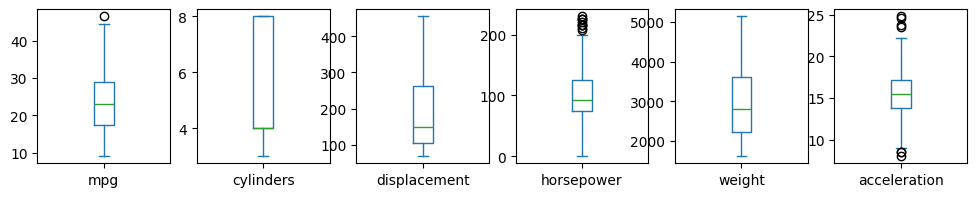

In [46]:
_ = df.plot(kind = "box", subplots = True, figsize = (12, 2))

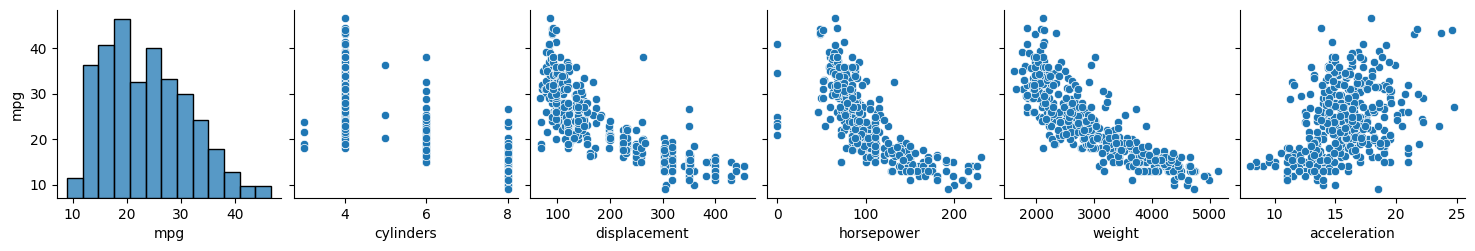

In [48]:
_= sns.pairplot(df, y_vars=["mpg"])

In [ ]:
_ = sns.pairplot(df)

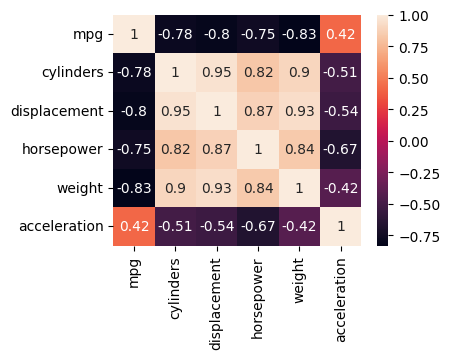

In [51]:
_ = sns.heatmap(df.corr(), annot = True)

Using Variance Inflation factor to identify multi-colinearity

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels import api

features = df.drop(columns=["mpg"])
features = api.add_constant(features)

vif_result = pd.DataFrame()
vif_result["Variable"] = features.columns
vif_result["VIF value"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])] 
vif_result

,Variable,VIF value
0,const,131.629823
1,cylinders,10.513967
2,displacement,19.094942
3,horsepower,6.200522
4,weight,9.624730
5,acceleration,2.261522


In [55]:
data = df.loc[:, ["horsepower", "weight", "acceleration", "mpg"]]
data.head(2)

,horsepower,weight,acceleration,mpg
0,130,3504,12.0,18.0
1,165,3693,11.5,15.0


In [61]:
# Scalling of data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data.head(1)

,horsepower,weight,acceleration,mpg
0,0.565217,0.53615,0.238095,0.239362


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data.drop(columns=["mpg"])
y = data.mpg.to_frame()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = model.predict(X_test)

In [66]:
# Evaluation
from sklearn.metrics import r2_score

r2_score(y_pred, y_test)

0.48442073489346127

mpg   -0.001503
dtype: float64

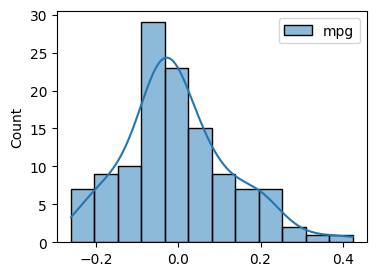

In [69]:
# plot residuals
residuals = y_test - y_pred
_ = sns.histplot(residuals, kde = True)
# _ = plt.axvline(residuals.mean(), color = "red")
residuals.mean()